<a href="https://colab.research.google.com/github/diptaban/Regression/blob/main/AIML_Lab5_PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

> 1. Take ten random values of X, type of X should be <class 'numpy.ndarray'>. Create polynomial $y$ as, $y = 6+4x+3x^2+7x^3$



> 2. Preprocess X, as 
$ X = 
 \begin{pmatrix}
1 & x^{(1)} & x^{(1)2} & x^{(1)3}  \\
1 & x^{(2)} & x^{(2)2} & x^{(2)3}  \\
1 & x^{(3)} & x^{(3)2} & x^{(3)3}  \\
1 & x^{(4)} & x^{(4)2} & x^{(4)3} 
\end{pmatrix}$

> 3. Randomly initialize the weights $(\theta_0,\theta_1,...\theta_n)$

## for $i = 1$ to no. of epochs {
> 3. Calculate hypothesis : $h_\theta(x^{(i)}) = \theta_0 + \theta_1x^{(i)}+\theta_2x^{(i)2}+\theta_3x^{(i)3}$

> 4. Calculate average mean squared error:
$J = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$

> 5. Update 
 > $\theta_0 := \theta_0 - \frac{\alpha}{m}\sum_{i=1}^m(h(x^{(i)}-y^{(i)})$
 > $\theta_j := \theta_j - \frac{\alpha}{m}\sum_{i=1}^m(h(x^{(i)}-y^{(i)})x_j^{(i)}$, $j=0,1,2,...n$
##}











/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


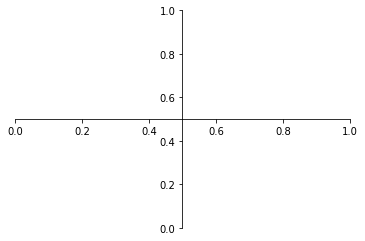

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 24 10:10:07 2022

@author: pradipta
"""
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax = fig.add_subplot(1, 1, 1)

def square_(x):
    return x**2
def cube_(x):
    return x**3
def fpow_(x):
    return x**4


def preprocessing(X):
    c = np.array(list(map(square_, X)))
    d = np.array(list(map(cube_,X)))
    e = np.array(list(map(fpow_,X)))
    X = np.concatenate((X,c),axis=1)
    X = np.concatenate((X,d),axis=1)
    #X = np.concatenate((X,e),axis=1)
    for i in range(np.shape(X)[1]):
        X[:,i] = X[:,i]/max(X[:,i])
    return X
    
    

def gradientDescent(X,y,epochs,alpha):
    cost =[]
    X = preprocessing(X)
    m = np.shape(X)[0]
    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    print('X'+str(X))
    n = np.shape(X)[1]
    
    W = np.random.rand(n,1)
    for i in range(epochs):
        h = np.dot(X,W)
        mse = (1/2*m)*sum((h-y)**2)
        D = h-y
        cost.append(mse)
        W = W - (alpha/2)*(np.dot(X.T,D))
    return(W,h,cost)

#X = np.array([[1,1.4],[4,3.2],[7,6.5],[3,4.5]])
#X = np.array([[1.0],[2.0],[3.0],[4.0],[5.0]])


    





(8, 1)
(8, 1)
X[[1.00000000e+00 4.39024390e-02 1.92742415e-03 8.46186213e-05]
 [1.00000000e+00 8.78048780e-02 7.70969661e-03 6.76948971e-04]
 [1.00000000e+00 1.51219512e-01 2.28673409e-02 3.45798813e-03]
 [1.00000000e+00 2.43902439e-01 5.94883998e-02 1.45093658e-02]
 [1.00000000e+00 6.82926829e-01 4.66389054e-01 3.18509598e-01]
 [1.00000000e+00 7.80487805e-01 6.09161214e-01 4.75442898e-01]
 [1.00000000e+00 8.78048780e-01 7.70969661e-01 6.76948971e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]]
[[ 0.46817803]
 [ 1.13924825]
 [-0.02459346]
 [-1.27064151]]


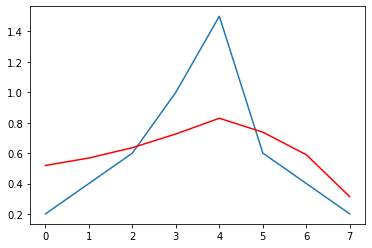

In [ ]:
#X = np.random.rand(10,1)
#y = 6+4*X+3*X**2+7*X**3

X = np.array([[3.6],[7.2],[12.4],[20.0],[56.0],[64.00],[72.000],[82.000]])
y=np.array([[0.2],[0.4],[0.6],[1.0],[1.5],[0.6],[0.4],[0.2]])

print(X.shape)
print(y.shape)
plt.plot(y)
# epochs = 1000, alpha = 0.01
# fixed epochs = 500, change alpha = 0.0001,0.001,0.01
(W,h,cost)=gradientDescent(X,  y, epochs=200, alpha=0.1)
#print(W)
#plt.plot(cost,'.g')  
plt.plot(h,'-r')
print(W)

In [ ]:
print(cost)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[-1.39199004e-05]
 [ 1.00795614e+00]
 [-1.52125699e+00]
 [ 5.50794656e-01]]
(4, 1)
(100, 1)


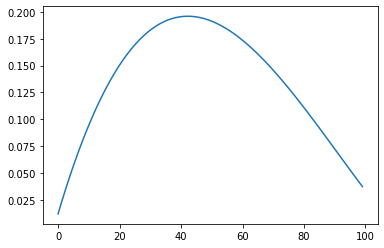

In [ ]:
X = np.array([[3.6],[7.2],[12.4],[20.0],[56.0],[64.00],[72.000],[82.000]])
y=0.2*np.array([[0.2],[0.4],[0.6],[0.8],[0.8],[0.6],[0.4],[0.2]])
X = preprocessing(X)
m = np.shape(X)[0]
X = np.concatenate((np.ones((m, 1)), X), axis=1)
fst = np.linalg.inv(X.T.dot(X))
snd = X.T.dot(y)
theta = fst.dot(snd)
print(theta)
print(theta.shape)
x = (np.array([np.linspace(1, 82, 100)])).T
print(x.shape)
x  = preprocessing(x)
m = np.shape(x)[0]
x= np.concatenate((np.ones((m, 1)), x), axis=1)

hyp = x.dot(theta)

plt.plot(hyp)

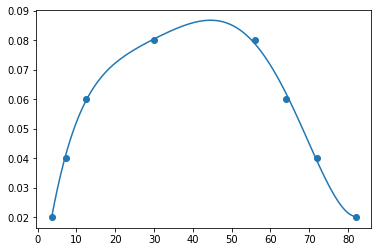

(6,)


In [ ]:
x = np.array([3.6,7.2,12.4,30.0,56.0,64.00,72.000,82.000])
y=0.1*np.array([0.2,0.4,0.6,0.8,0.8,0.6,0.4,0.2])

#x = np.array([3.6,10.2,25,60,75.000,82.000])
#y=0.5*np.array([0.2,0.4,0.6,0.6,0.4,0.2])

z = np.polyfit(x, y, 5)
mymodel = np.poly1d(z)
myline = np.linspace(3.6, 82, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()
print(z.shape)

[-0.00042357  0.03466546  0.15479116]


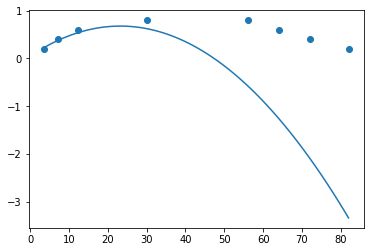

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
theta = [-0.0011629584789889572, 0.05402182264535082, 0.050366925606219894]
#x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0])
#y = np.array([1.0, 4.0, 9.0, 16.0, 25.0, 36.0, 49.0, 64.0, 81.0, 100.0, 121.0, 144.0, 169.0, 196.0, 225.0])
x = np.array([3.6,7.2,12.4,30.0,56.0,64.00,72.000,82.000])
y = np.array([0.2,0.4,0.6,0.8,0.8,0.6,0.4,0.2])
z = np.polyfit(x, y, 2)
print(z)
mymodel = np.poly1d(theta)
myline = np.linspace(3.6, 82, 100)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()